In [1]:
import pickle
with open("lateral_doping.pkl",'rb') as f:
    storage_dict = pickle.load(f)

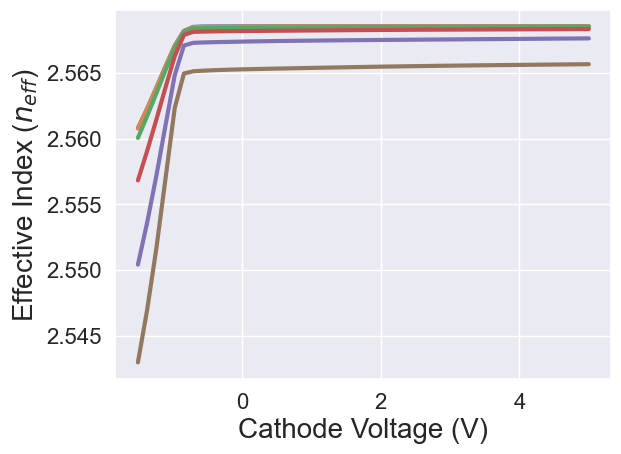

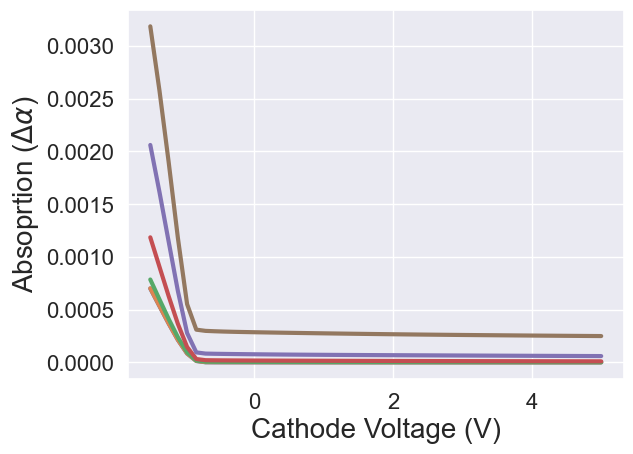

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use("../../mplstyle.mplstyle")
import numpy as np
dopings = storage_dict.keys()
plt.figure()
for i in dopings:
    plt.plot(storage_dict[i][0],np.real(storage_dict[i][1]))
plt.xlabel("Cathode Voltage (V)")
plt.ylabel("Effective Index " + r"($n_{eff}$)")
plt.show()

plt.figure()
for i in dopings:
    plt.plot(storage_dict[i][0],np.imag(storage_dict[i][1]))
plt.xlabel("Cathode Voltage (V)")
plt.ylabel("Absoprtion " + r"($\Delta \alpha$)")
plt.show()

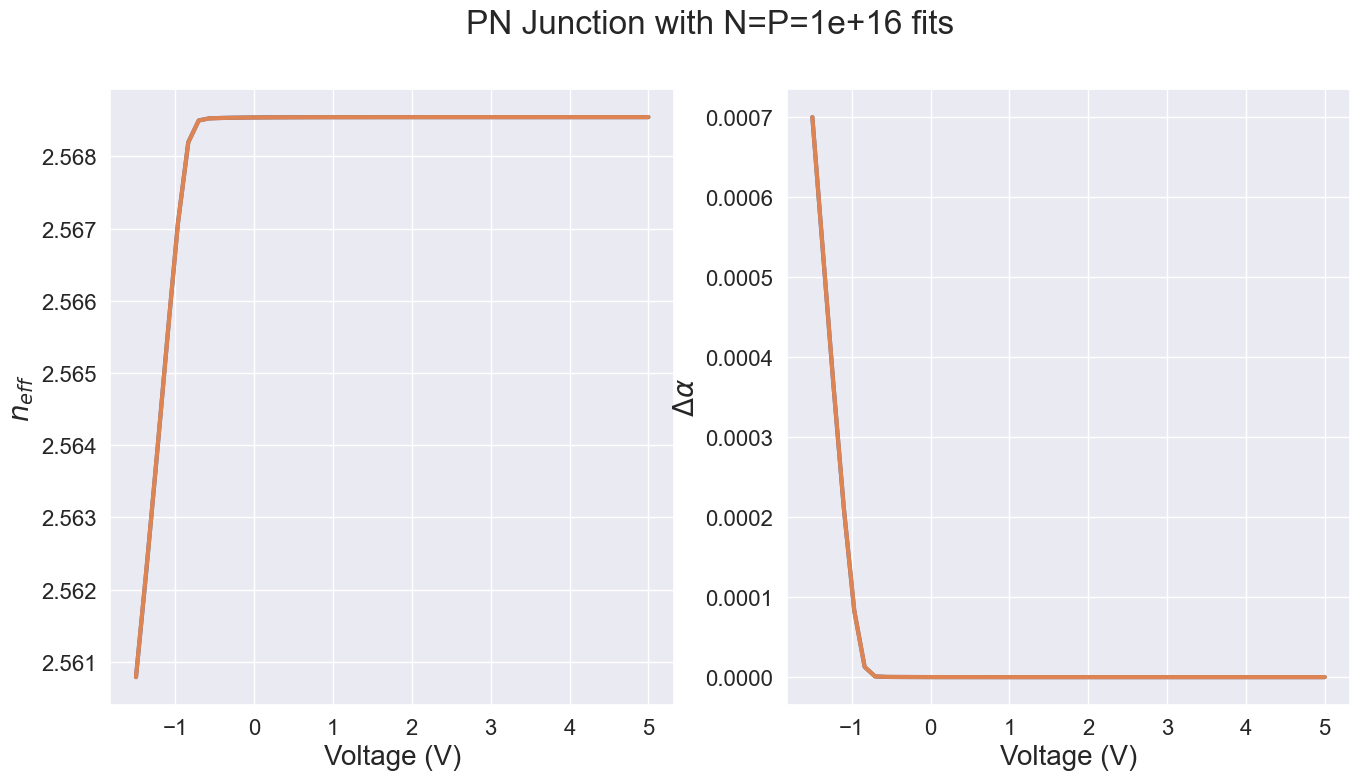

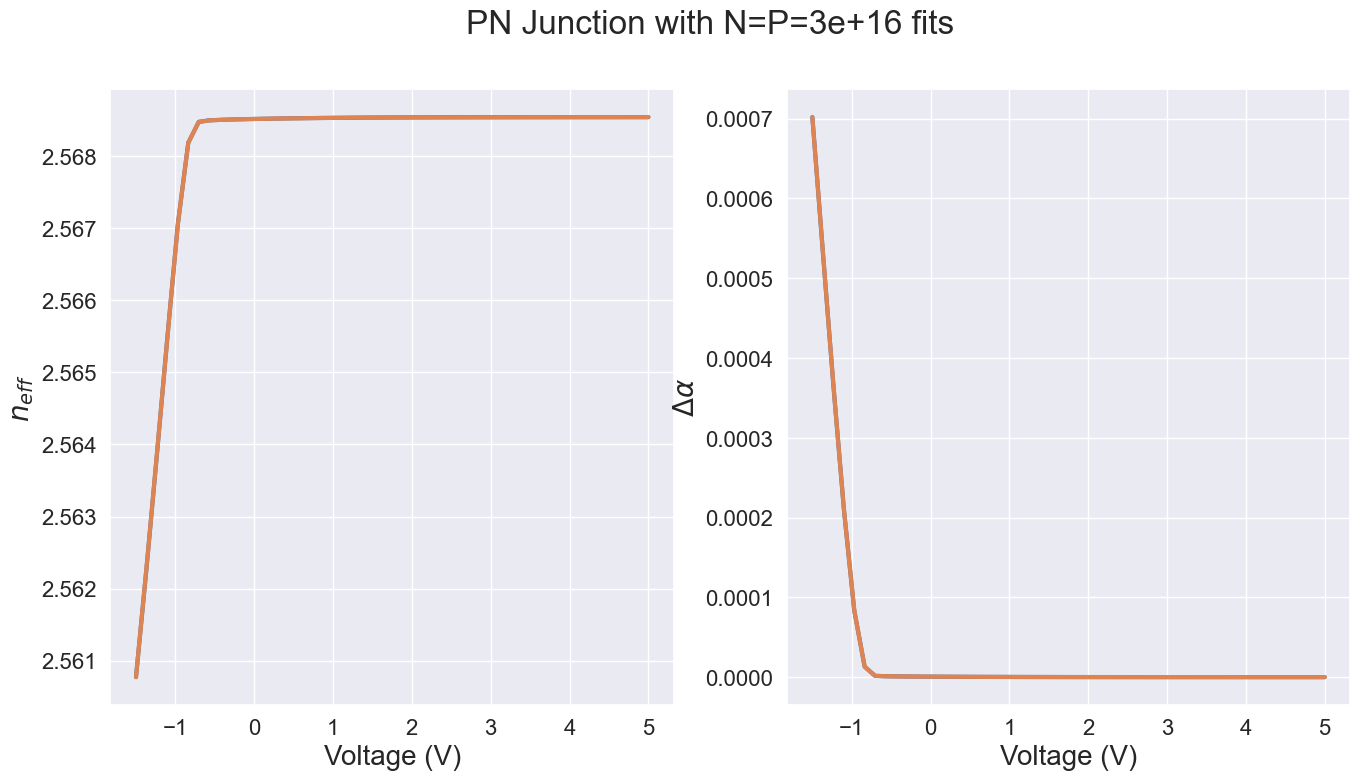

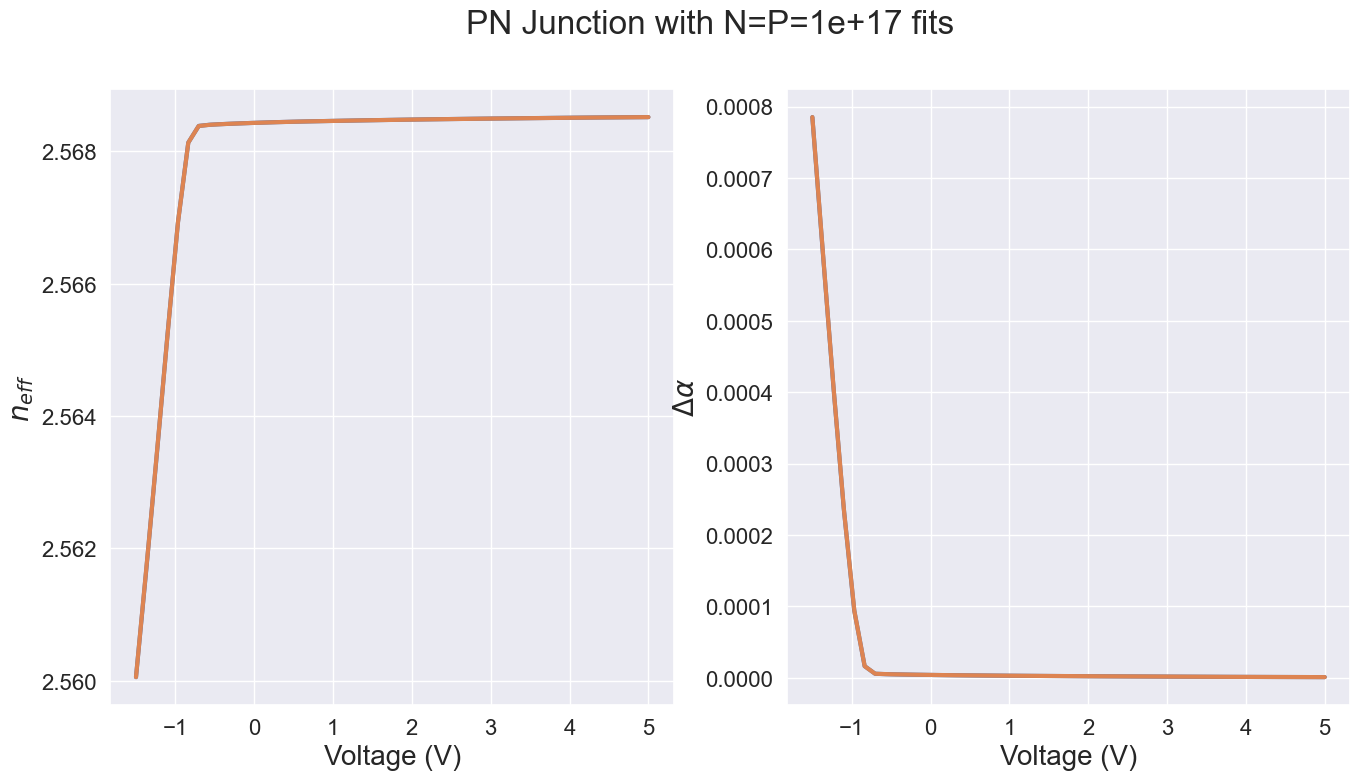

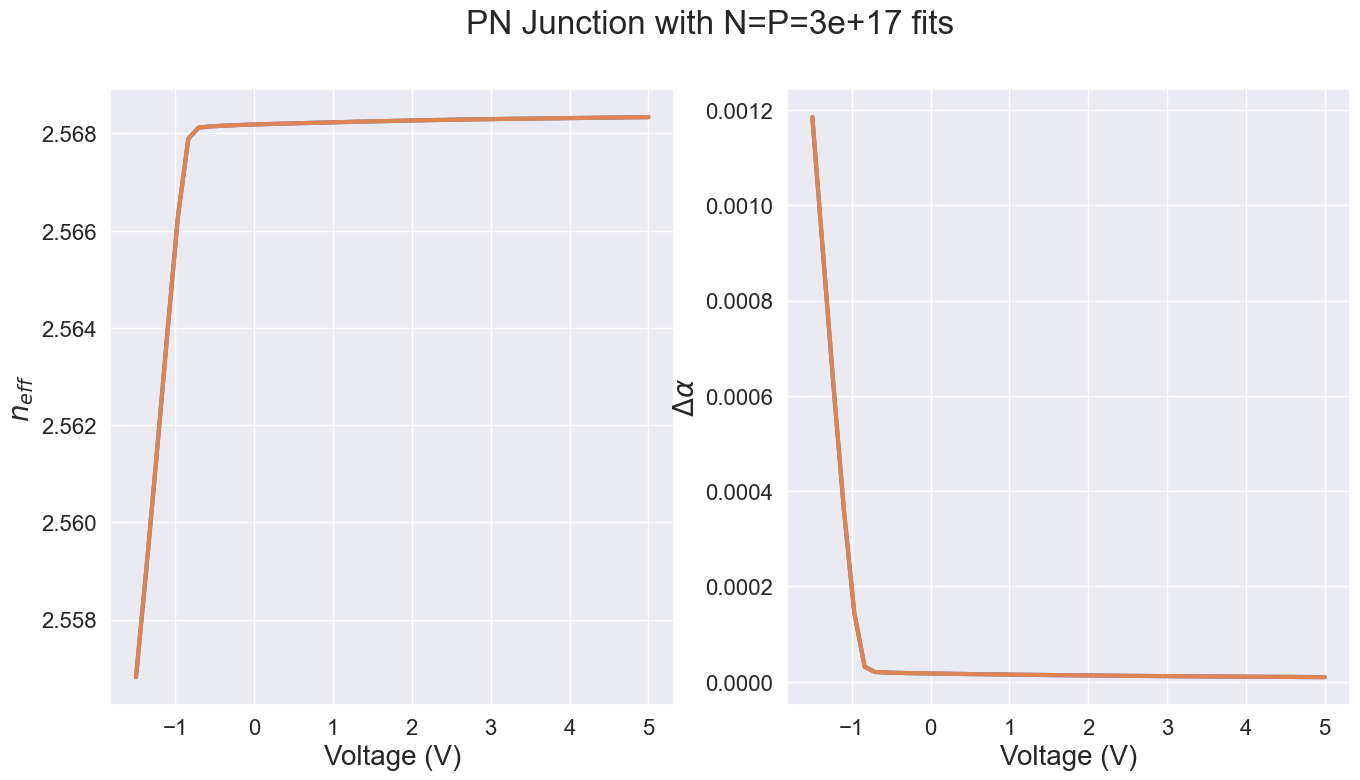

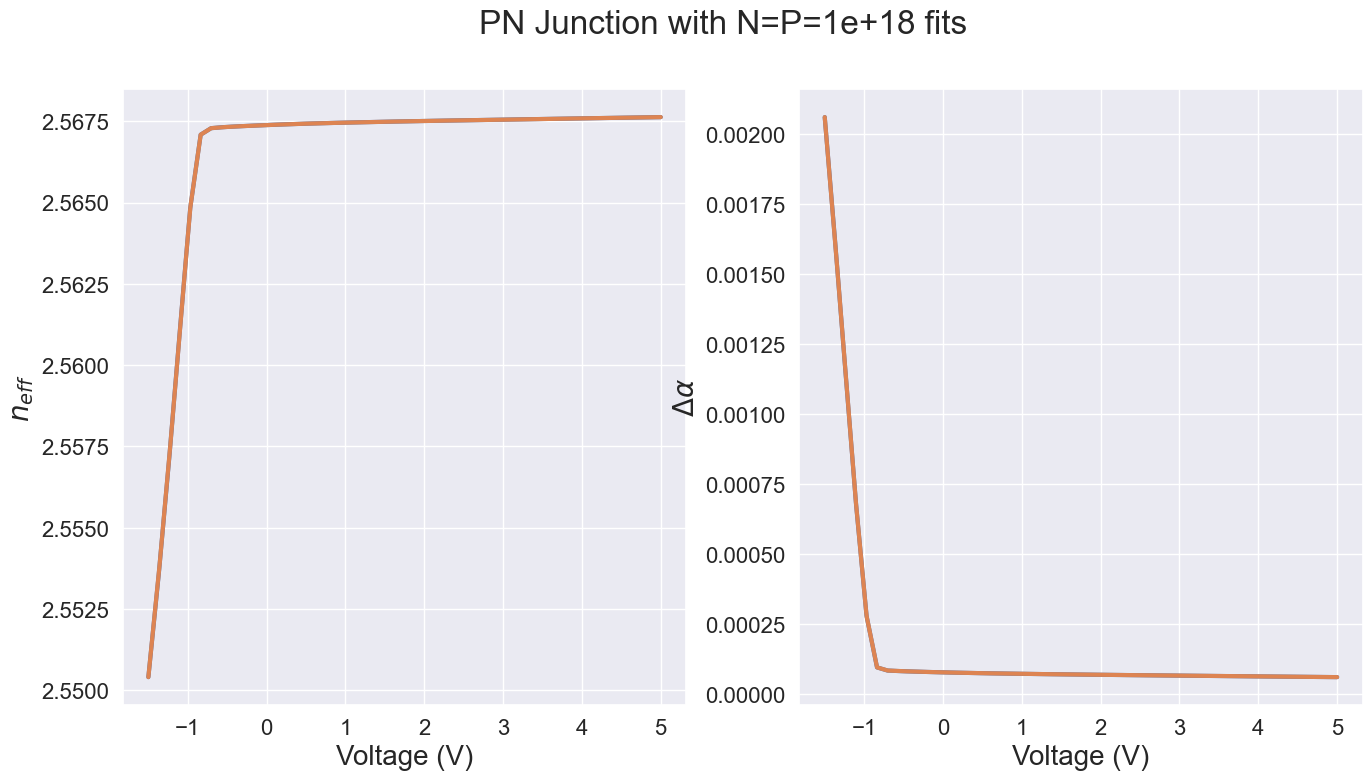

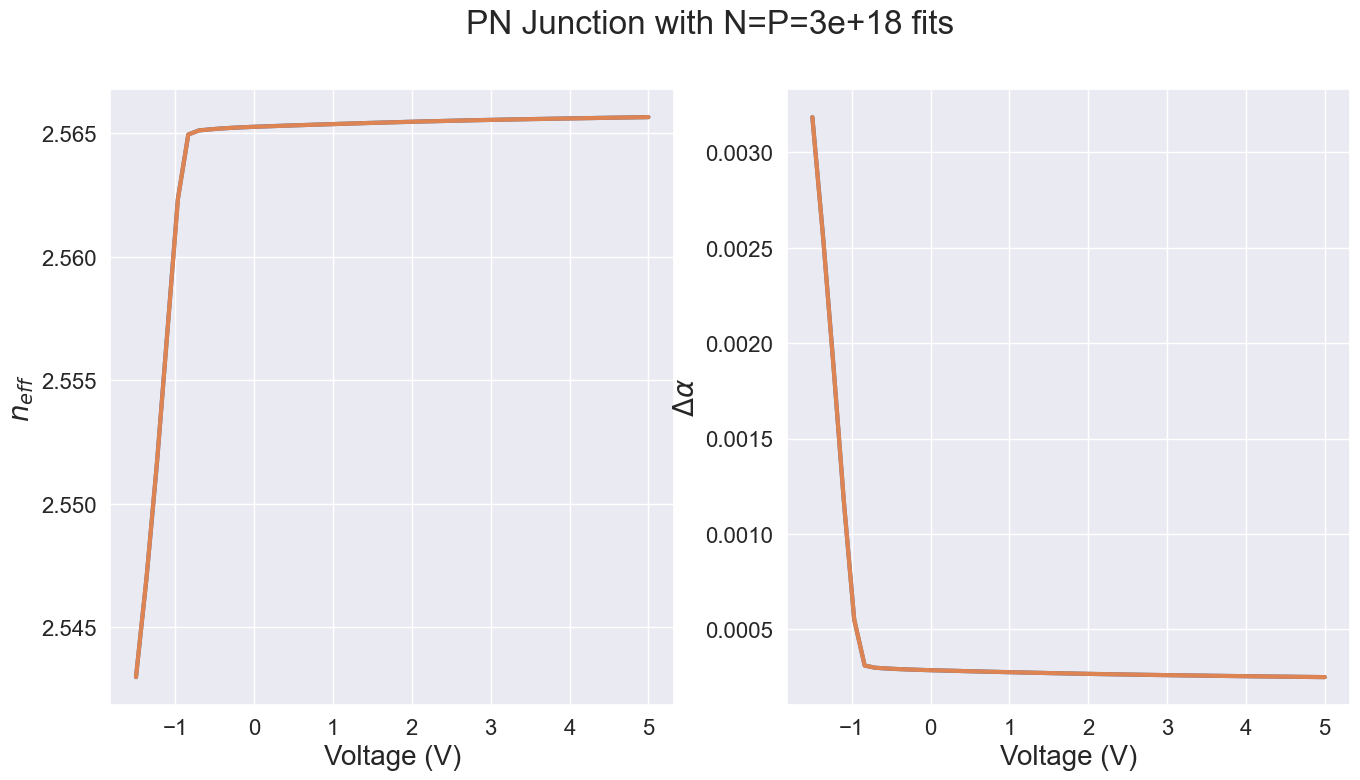

In [8]:
# How do all of these devices perform?
# Generate fits and check them
def neff_fit(x,doping):
    return  np.interp(x,storage_dict[doping][0],np.real(storage_dict[doping][1]))
def alpha_fit(x,doping):
    return np.interp(x,storage_dict[doping][0],np.imag(storage_dict[doping][1]))

for index,value in enumerate(dopings):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
    fig.suptitle(f"PN Junction with N=P={value} fits")
    ax1.plot(storage_dict[value][0],np.real(storage_dict[value][1]))
    voltage_sweep = np.linspace(np.min(storage_dict[value][0]),np.max(storage_dict[value][0]),num=1000)
    ax1.plot(voltage_sweep,[neff_fit(v,value) for v in voltage_sweep])
    ax1.set_xlabel("Voltage (V)")
    ax1.set_ylabel(r"$n_{eff}$")
    ax2.plot(storage_dict[value][0],np.imag(storage_dict[value][1]))
    ax2.plot(voltage_sweep,[alpha_fit(v,value) for v in voltage_sweep])
    ax2.set_xlabel("Voltage (V)")
    ax2.set_ylabel(r"$\Delta \alpha$")
    plt.show()

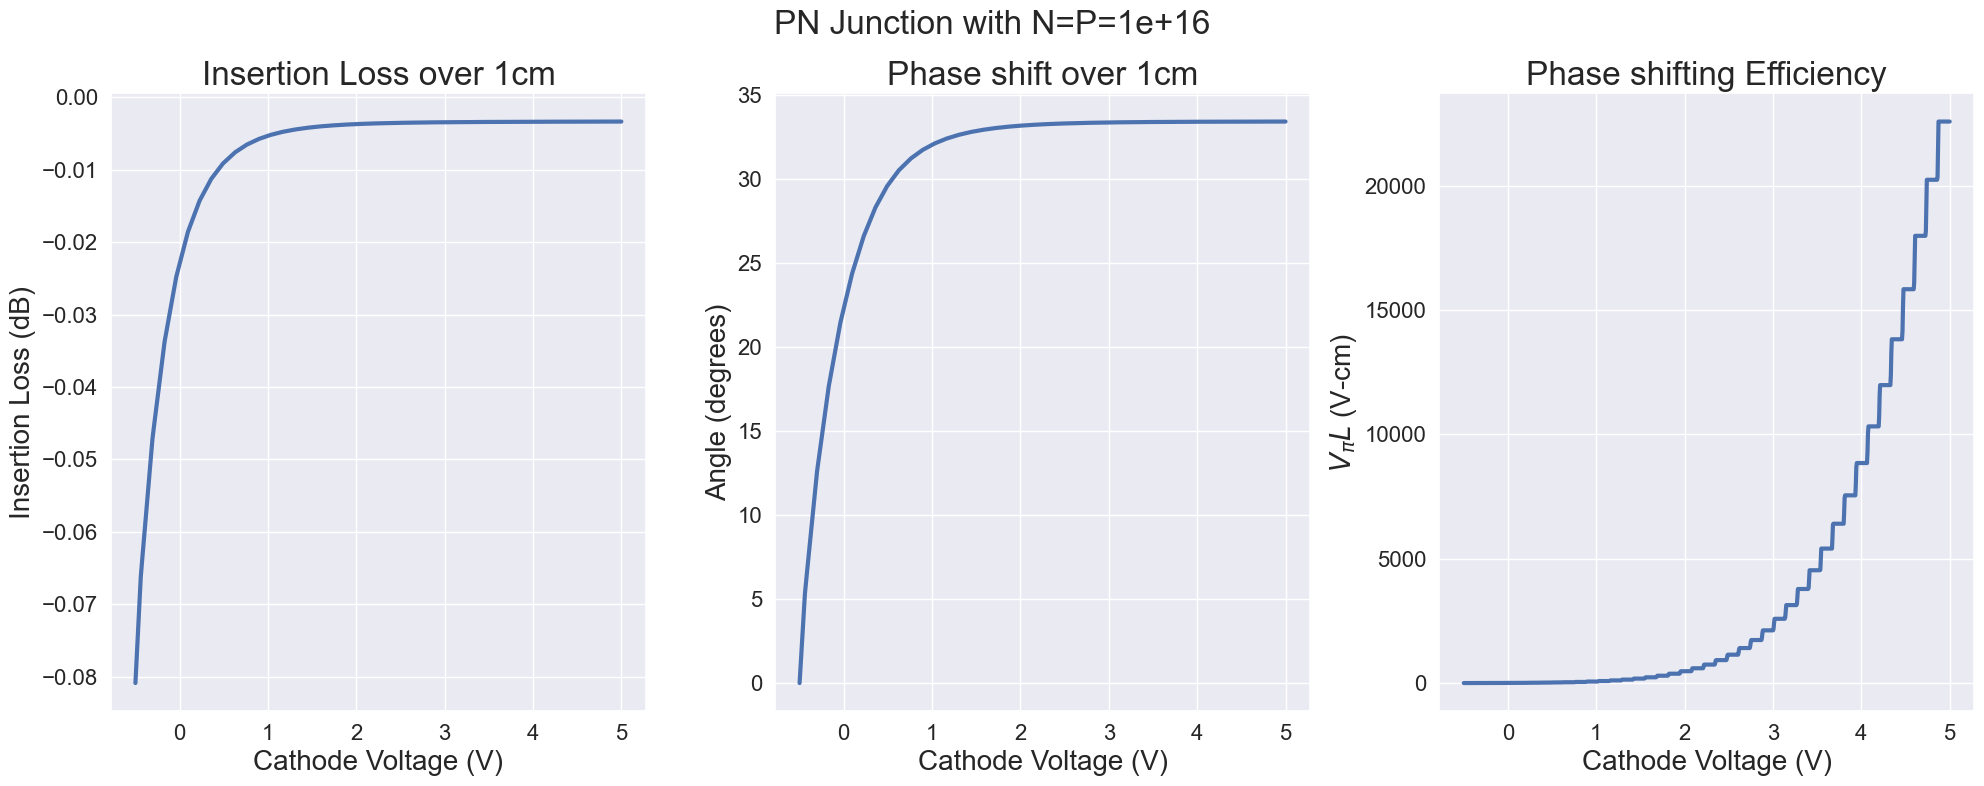

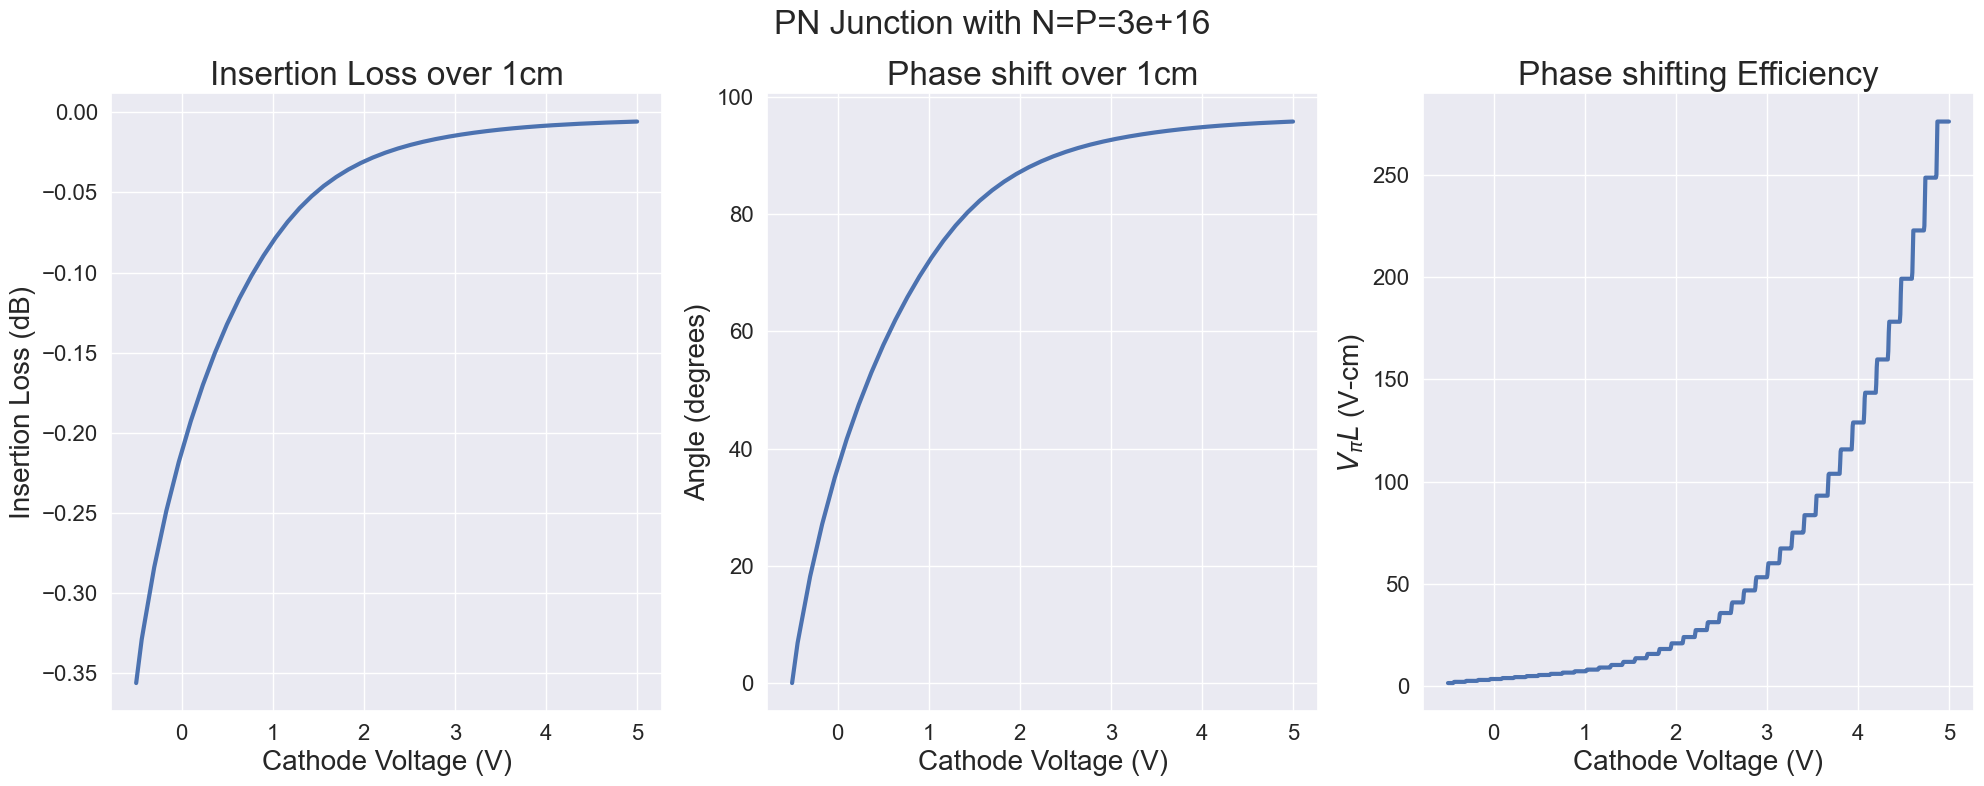

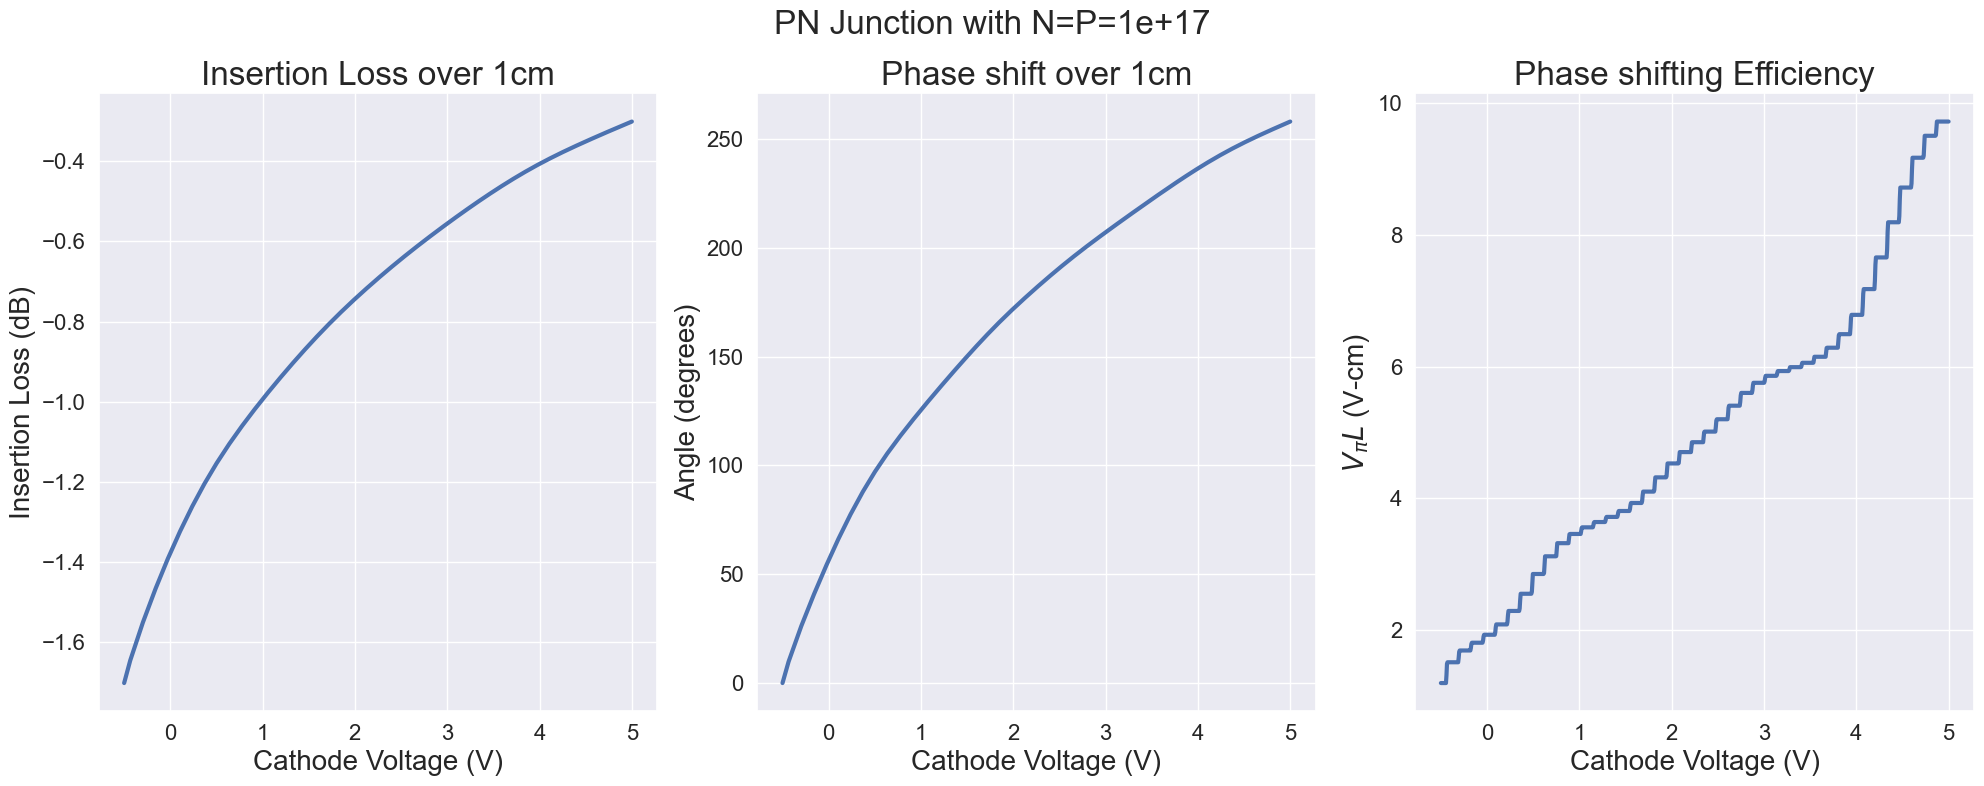

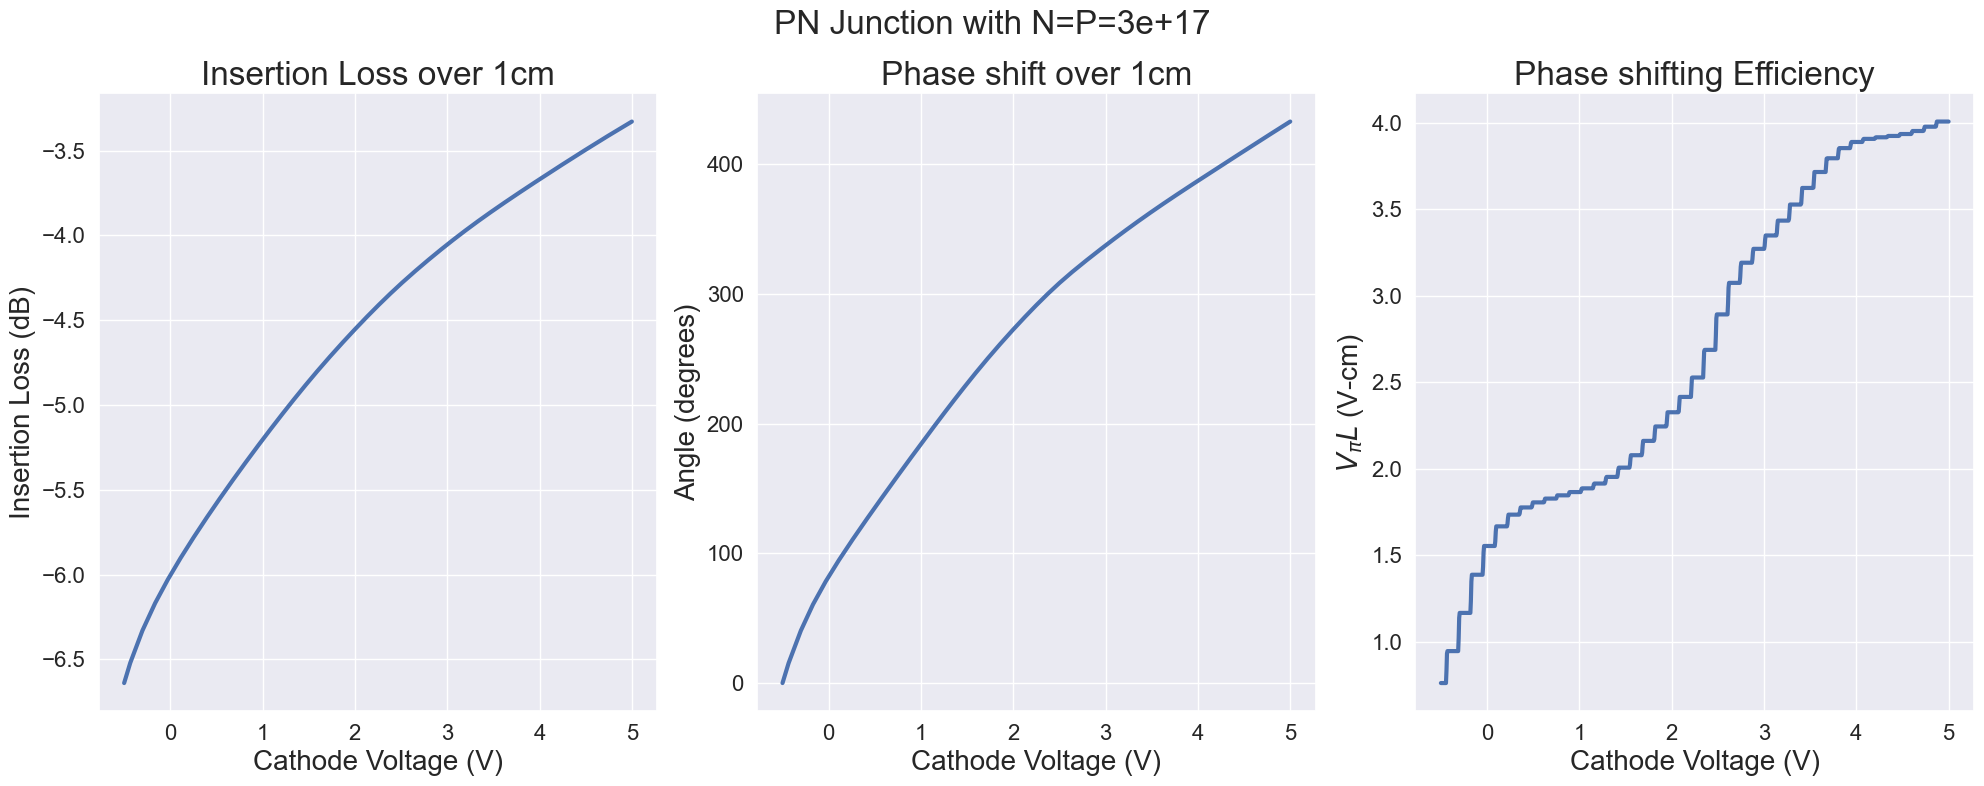

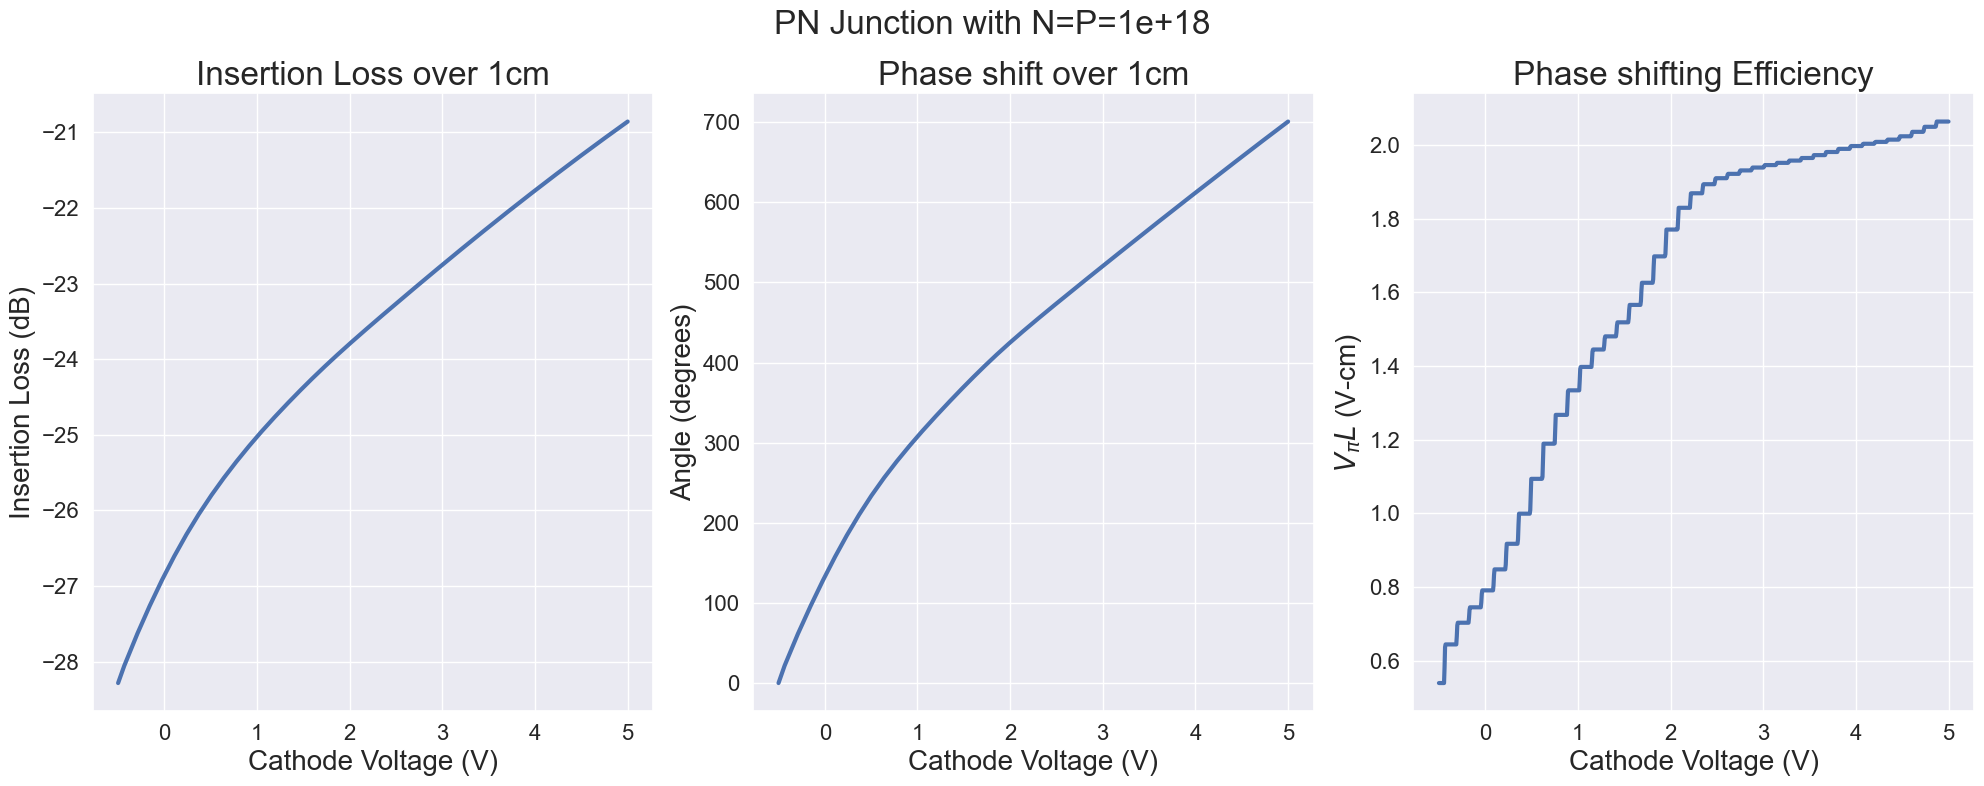

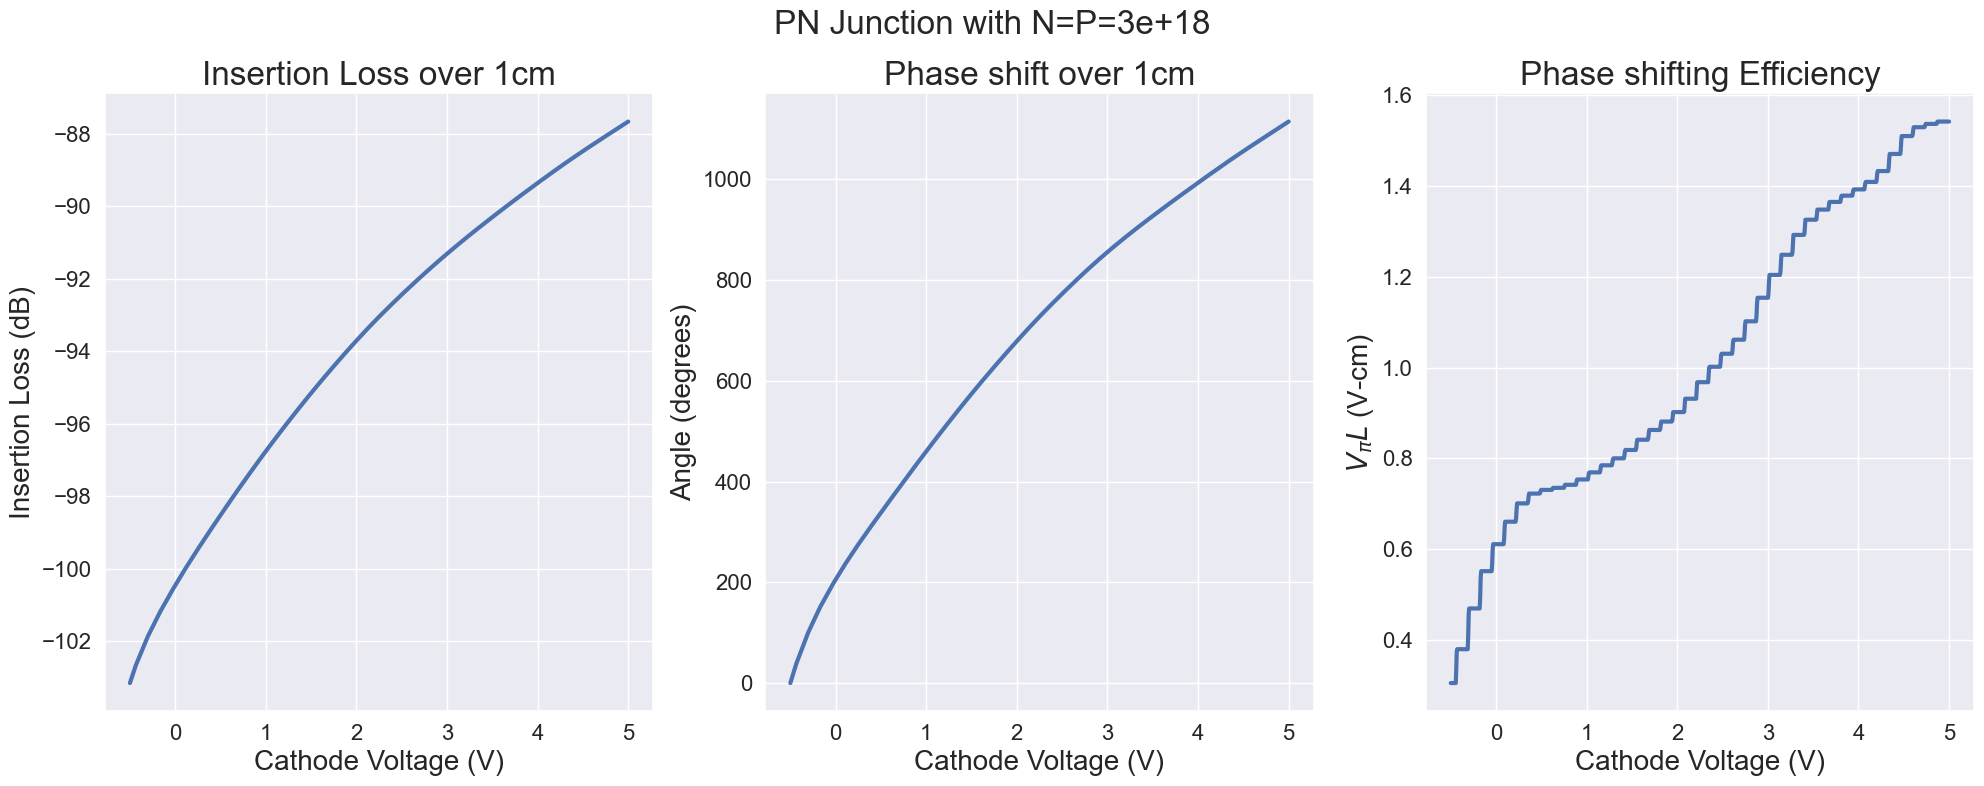

In [26]:
# The fits seem good, let's create a pn phase shifter out of each doping concentration and see how they perform
voltage_sweep = np.linspace(-0.5,5.0,num=1000)
Lambda = 1550*10**(-9)
L = 10**(-2) #1 cm for benchmarking phase shifting in V-cm
for index,value in enumerate(dopings):
    field_transmission = np.array([np.exp(1j*2*np.pi*(neff_fit(v,value) + 1j*alpha_fit(v,value)) *L/Lambda) for v in voltage_sweep])
    power_transmission = np.real(field_transmission * np.conj(field_transmission))
    insertion_loss = 10*np.log10(power_transmission)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
    fig.suptitle(f"PN Junction with N=P={value}")

    ax1.plot(voltage_sweep,insertion_loss)
    ax1.set_title("Insertion Loss over 1cm")
    ax1.set_xlabel("Cathode Voltage (V)")
    ax1.set_ylabel("Insertion Loss (dB)")

    angle = np.unwrap(np.angle(field_transmission) - np.angle(field_transmission[0]))
    ax2.plot(voltage_sweep,180/np.pi*(angle))
    ax2.set_title("Phase shift over 1cm")
    ax2.set_xlabel("Cathode Voltage (V)")
    ax2.set_ylabel("Angle (degrees)")

    deltaV = voltage_sweep[1] - voltage_sweep[0] #Voltage step size
    deltaphi_over_deltaV = np.gradient(angle,deltaV)
    VpiL = np.pi*L*1.0/deltaphi_over_deltaV #In V-m
    ax3.plot(voltage_sweep,VpiL*1e2)
    ax3.set_title("Phase shifting Efficiency")
    ax3.set_xlabel("Cathode Voltage (V)")
    ax3.set_ylabel(r"$V_{\pi}L$ (V-cm)")
    plt.tight_layout()
    plt.show()